In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
df=pd.read_csv("C:/Users/aiger/Desktop/MSFE/IE517/HW7/ccdefault.csv")

In [16]:
from sklearn.preprocessing import StandardScaler
stad=StandardScaler()
X= df.iloc[:, 1:24]
y=df[['DEFAULT']]

In [21]:
steps=[('imputer', KNNImputer(n_neighbors=2, weights='uniform')), ('scaler', StandardScaler()), 
       ('random_forest', RandomForestClassifier())]
pipeline=Pipeline(steps)
X, y =df.iloc[:, 1:24], df[['DEFAULT']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=33)
params_rf = {
    'random_forest__n_estimators': range(10,25)
}

grid=GridSearchCV(pipeline, param_grid=params_rf)
grid.fit(X_train, np.ravel(y_train))
y_pred=grid.predict(X_test)

print('Accuracy: %4f' % grid.score(X_test, np.ravel(y_test)))
print('Tuned Model Parameters: {}'.format(grid.best_params_))

Accuracy: 0.813000
Tuned Model Parameters: {'random_forest__n_estimators': 24}


In [23]:
rf=RandomForestClassifier(n_estimators=24, random_state=42)
cv_score=cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1)
print([float('{:.4f}'.format(i)) for i in cv_score])
print('Mean In-Sample: %.4f, std: %.4f' % (np.mean(cv_score), np.std(cv_score)))

[0.8052, 0.8089, 0.817, 0.8085, 0.8122, 0.8019, 0.807, 0.83, 0.8137, 0.8133]
Mean In-Sample: 0.8118, std: 0.0074


In [25]:
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=24, random_state=42)

In [26]:
print('Accuracy: %4f' % rf.score(X_test, np.ravel(y_test)))

Accuracy: 0.821000


In [28]:
rf=RandomForestClassifier(n_estimators=24, n_jobs=-1)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=24, n_jobs=-1)

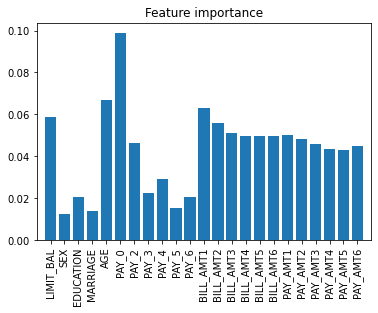

In [34]:
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
importances=pd.Series(data=rf.feature_importances_, index=indices)
importances_sorted=importances.sort_values(ascending=False)
feat_labels=df.columns[1:24]
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
_=plt.show()


 1) PAY_0                          0.098726
 2) AGE                            0.067011
 3) BILL_AMT1                      0.062948
 4) LIMIT_BAL                      0.058607
 5) BILL_AMT2                      0.056050
 6) BILL_AMT3                      0.051277
 7) PAY_AMT1                       0.049974
 8) BILL_AMT6                      0.049845
 9) BILL_AMT5                      0.049668
10) BILL_AMT4                      0.049590
11) PAY_AMT2                       0.048058
12) PAY_2                          0.046273
13) PAY_AMT3                       0.045887
14) PAY_AMT6                       0.045086
15) PAY_AMT4                       0.043306
16) PAY_AMT5                       0.043068
17) PAY_4                          0.029027
18) PAY_3                          0.022545
19) EDUCATION                      0.020682
20) PAY_6                          0.020434
21) PAY_5                          0.015383
22) MARRIAGE                       0.013789
23) SEX                         

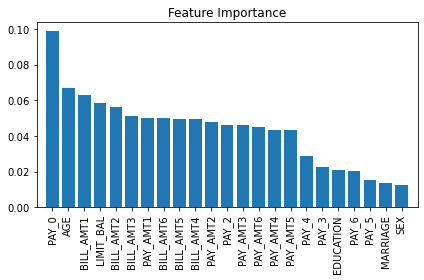

In [35]:
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [36]:
print("My name is Aigerim")
print("My NetID is: aigerim4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Aigerim
My NetID is: aigerim4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
